### MACHINE LEARNING (ML) WORKFLOW

### Project Objective
+ Predict the life expectancy of patients after Thoracic Surgery based on Machine Learning (ML) parameters

### Workflow
1. Data Preparation
2. Data Transformation
3. Exploratory Data Analysis (EDA)
4. Feature selection
5. Build model
6. Save model
7. Interpret model
8. Evaluate model

In [81]:
# Load my EDA Packages
import pandas as pd
import numpy as np

In [82]:
# Load our Data visualization Packages
import matplotlib.pyplot as plt
import seaborn as sns


In [83]:
# Load My Dataset
df = pd.read_csv("C:\\Datasets\\ThoracicSurgery.csv")

In [84]:
# Preview the first data point
df.head(10)

,Diagnosis,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes_Mellitus,MI_6mo,PAD,Smoking,Asthma,Age,Death_1yr
0,2,2.88,2.16,1,0,0,0,1,1,4,0,0,0,1,0,60,0
1,3,3.40,1.88,0,0,0,0,0,0,2,0,0,0,1,0,51,0
2,3,2.76,2.08,1,0,0,0,1,0,1,0,0,0,1,0,59,0
3,3,3.68,3.04,0,0,0,0,0,0,1,0,0,0,0,0,54,0
4,3,2.44,0.96,2,0,1,0,1,1,1,0,0,0,1,0,73,1
5,3,2.48,1.88,1,0,0,0,1,0,1,0,0,0,0,0,51,0
6,3,4.36,3.28,1,0,0,0,1,0,2,1,0,0,1,0,59,1
7,2,3.19,2.50,1,0,0,0,1,0,1,0,0,1,1,0,66,1
8,3,3.16,2.64,2,0,0,0,1,1,1,0,0,0,1,0,68,0
9,3,2.32,2.16,1,0,0,0,1,0,1,0,0,0,1,0,54,0


In [85]:
df.head()

,Diagnosis,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes_Mellitus,MI_6mo,PAD,Smoking,Asthma,Age,Death_1yr
0,2,2.88,2.16,1,0,0,0,1,1,4,0,0,0,1,0,60,0
1,3,3.40,1.88,0,0,0,0,0,0,2,0,0,0,1,0,51,0
2,3,2.76,2.08,1,0,0,0,1,0,1,0,0,0,1,0,59,0
3,3,3.68,3.04,0,0,0,0,0,0,1,0,0,0,0,0,54,0
4,3,2.44,0.96,2,0,1,0,1,1,1,0,0,0,1,0,73,1


In [86]:
df.columns

Index(['Diagnosis', 'FVC', 'FEV1', 'Performance', 'Pain', 'Haemoptysis',
       'Dyspnoea', 'Cough', 'Weakness', 'Tumor_Size', 'Diabetes_Mellitus',
       'MI_6mo', 'PAD', 'Smoking', 'Asthma', 'Age', 'Death_1yr'],
      dtype='object')

In [87]:
df.head()

,Diagnosis,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes_Mellitus,MI_6mo,PAD,Smoking,Asthma,Age,Death_1yr
0,2,2.88,2.16,1,0,0,0,1,1,4,0,0,0,1,0,60,0
1,3,3.40,1.88,0,0,0,0,0,0,2,0,0,0,1,0,51,0
2,3,2.76,2.08,1,0,0,0,1,0,1,0,0,0,1,0,59,0
3,3,3.68,3.04,0,0,0,0,0,0,1,0,0,0,0,0,54,0
4,3,2.44,0.96,2,0,1,0,1,1,1,0,0,0,1,0,73,1


In [88]:
# Data types
df.dtypes

Diagnosis              int64
FVC                  float64
FEV1                 float64
Performance            int64
Pain                   int64
Haemoptysis            int64
Dyspnoea               int64
Cough                  int64
Weakness               int64
Tumor_Size             int64
Diabetes_Mellitus      int64
MI_6mo                 int64
PAD                    int64
Smoking                int64
Asthma                 int64
Age                    int64
Death_1yr              int64
dtype: object

In [89]:
#How many columns with objects
sum(df.dtypes == 'object')

0

In [90]:
df.columns[df.dtypes == 'object']

Index([], dtype='object')

In [91]:
df.describe()

,Diagnosis,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes_Mellitus,MI_6mo,PAD,Smoking,Asthma,Age,Death_1yr
count,454.000000,454.000000,454.00000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000
mean,3.092511,3.287952,2.51685,0.795154,0.059471,0.136564,0.055066,0.696035,0.171806,1.733480,0.074890,0.004405,0.017621,0.828194,0.004405,62.777533,0.151982
std,0.715817,0.872347,0.77189,0.531459,0.236766,0.343765,0.228361,0.460475,0.377628,0.707499,0.263504,0.066299,0.131715,0.377628,0.066299,8.449634,0.359400
min,1.000000,1.440000,0.96000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.000000,0.000000
25%,3.000000,2.600000,1.96000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,57.000000,0.000000
50%,3.000000,3.160000,2.36000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,62.000000,0.000000
75%,3.000000,3.840000,2.97750,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,69.000000,0.000000
max,8.000000,6.300000,5.48000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,87.000000,1.000000


In [92]:
target_label = {'Death_1yr'}

In [93]:
# Value count 
df['Death_1yr'].value_counts()

0    385
1     69
Name: Death_1yr, dtype: int64

<Axes: >

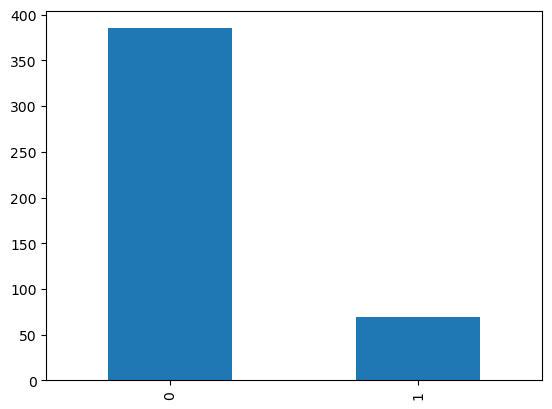

In [94]:
# Plot of value
df['Death_1yr'].value_counts().plot(kind='bar')

### Frequency distribution table using the Age Range

In [95]:
df['Age'].max()

87

In [96]:
df['Age'].min()

37

In [97]:
labels = ["Less than 10", "10-20", "20-30", "30-40", "40-50", "50-60", "60-70", "70 and more"]
bins = [0,10,20,30,40,50,60,70,80]
freq_df = df.groupby(pd.cut(df['Age'], bins=bins, labels=labels)).size()

In [98]:
freq_df

Age
Less than 10      0
10-20             0
20-30             0
30-40             4
40-50            18
50-60           170
60-70           169
70 and more      88
dtype: int64

<Axes: xlabel='Age'>

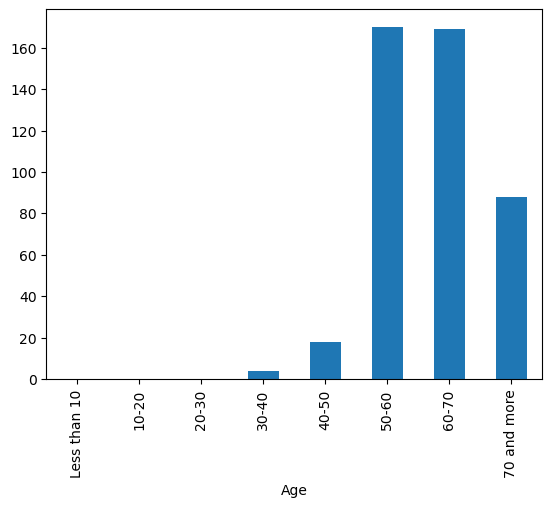

In [99]:
freq_df.plot(kind="bar")

### Narrative 1
+ Highest prevalence of Hepatitis is from 30 - 40 years
+ The least is individual under 10 years, and elderly above 70 years

### Checking for outliers
+ Univariate Analysis
+ Multivariate Analysis

### Methods
+ Boxplot (Uni)
+ Scatterplot (Multi)
+ Z-score
+ IQR (Interquantile Range)

<Axes: >

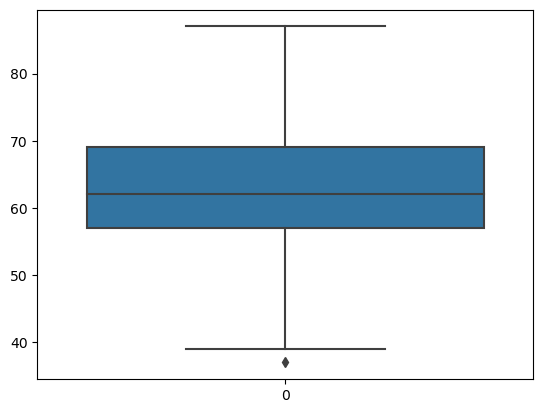

In [100]:
### Using Box-plot for outliers detection
import seaborn as sns
sns.boxplot(df['Age'])

<Axes: xlabel='Age', ylabel='Haemoptysis'>

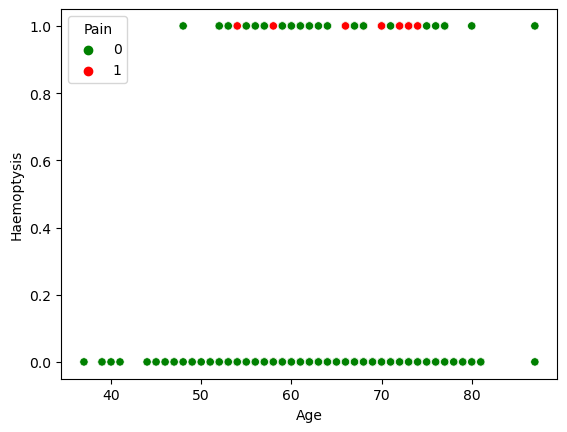

In [202]:
# Scatter Plot
sns.scatterplot(x=df['Age'], y=df['Haemoptysis'], hue=df['Pain'], palette=['green', 'red'], data=df)

### Using Interquartile Range
+ H-Spread/Mid_Spread
+ Measures the statistical dispersion/spread
+ IQR = Quantile 3(75) - Quantile 1(25)

In [101]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)

In [102]:
IQR = q1 - q3

In [103]:
IQR

Diagnosis             0.0000
FVC                  -1.2400
FEV1                 -1.0175
Performance          -1.0000
Pain                  0.0000
Haemoptysis           0.0000
Dyspnoea              0.0000
Cough                -1.0000
Weakness              0.0000
Tumor_Size           -1.0000
Diabetes_Mellitus     0.0000
MI_6mo                0.0000
PAD                   0.0000
Smoking               0.0000
Asthma                0.0000
Age                 -12.0000
Death_1yr             0.0000
dtype: float64

In [104]:
### Get the actual data point that is an outlier
(df < (q1 - 1.5 * IQR)) | (df >(q3 + 1.5 * IQR))

,Diagnosis,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes_Mellitus,MI_6mo,PAD,Smoking,Asthma,Age,Death_1yr
0,True,True,True,True,False,False,False,True,True,True,False,False,False,False,False,True,False
1,False,True,True,True,False,False,False,True,False,True,False,False,False,False,False,True,False
2,False,True,True,True,False,False,False,True,False,True,False,False,False,False,False,True,False
3,False,True,True,True,False,False,False,True,False,True,False,False,False,True,False,True,False
4,False,True,True,True,False,True,False,True,True,True,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,True,True,True,True,False,False,False,True,False,True,False,False,False,False,False,True,False
450,False,True,True,True,False,False,False,True,False,True,False,False,False,False,False,True,False
451,False,True,True,True,False,False,False,True,False,True,False,False,False,True,False,True,False
452,False,True,True,True,False,False,False,True,True,True,False,False,False,False,False,True,False


### Narative 
+ The data points with True are the Outliers


#### Solution
+ Remove
+ Change
+ Ignore

In [105]:
#Removing all outliers
df_no_outlier = df[-((df < (q1 - 1.5 * IQR)) | (df >(q3 + 1.5 * IQR))).any(axis=1)]

In [106]:
df_no_outlier

,Diagnosis,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes_Mellitus,MI_6mo,PAD,Smoking,Asthma,Age,Death_1yr


In [107]:
print(df.shape)

(454, 17)


In [108]:
print(df_no_outlier.shape)

(0, 17)


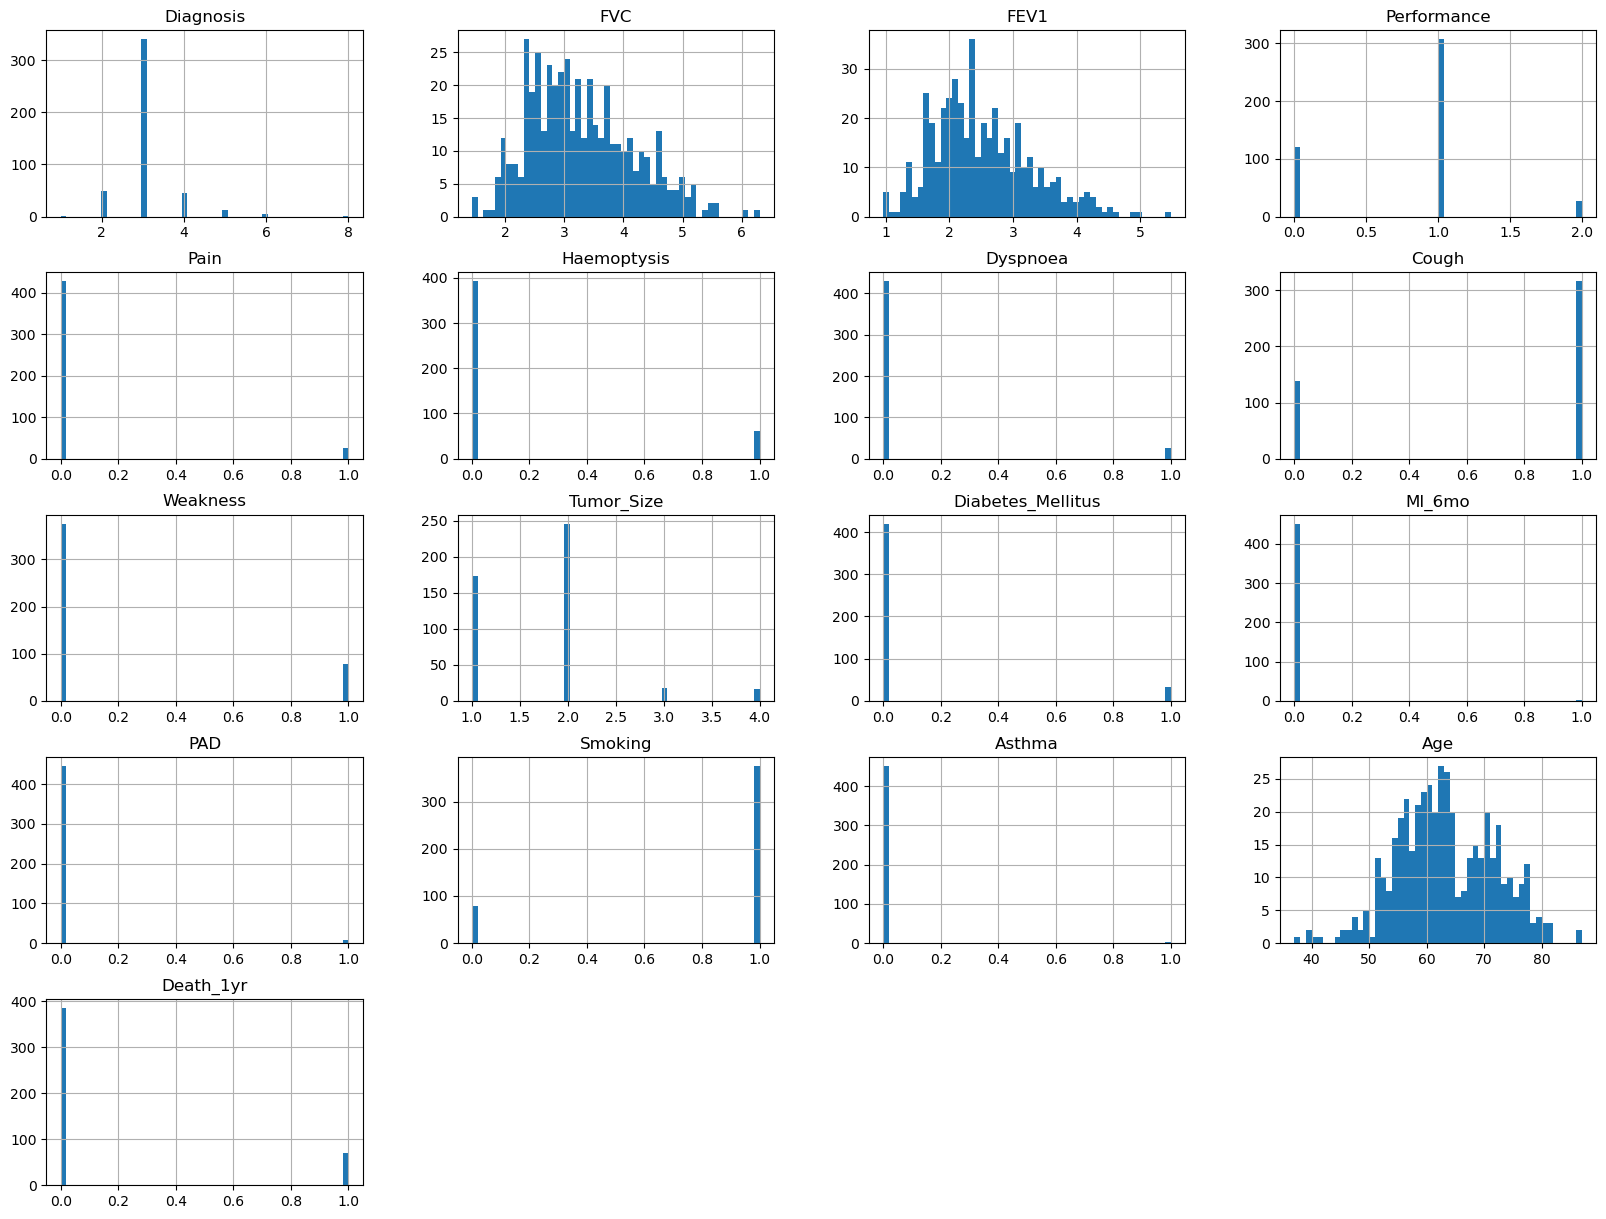

In [109]:
### Plot of distribution of data
df.hist(bins=50, figsize=(20,15))
plt.show()

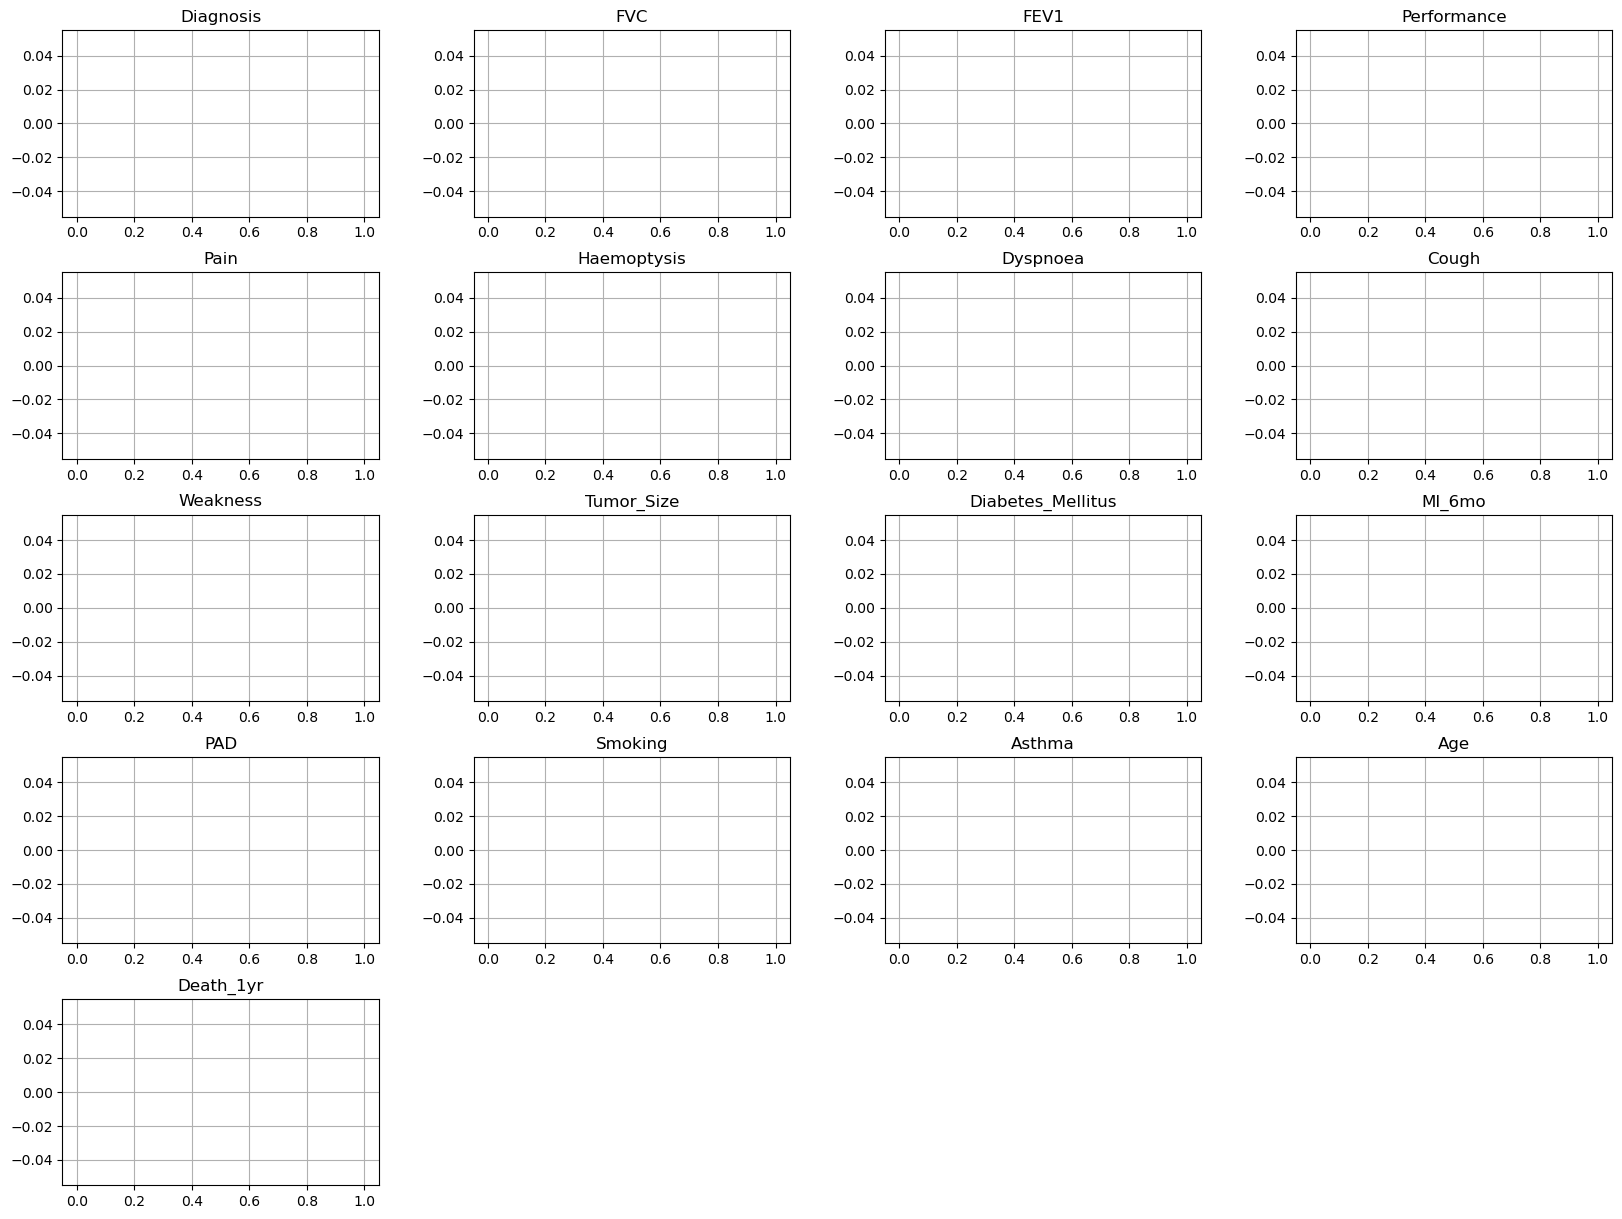

In [110]:
### Plot of distribution of data
df_no_outlier.hist(bins=50, figsize=(20,15))
plt.show()

### Feature Selection and Importance
+ SelectKbest
  - Strong relationship with the output/target

+ Recursive Feature Elimination

In [111]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [112]:
df.columns

Index(['Diagnosis', 'FVC', 'FEV1', 'Performance', 'Pain', 'Haemoptysis',
       'Dyspnoea', 'Cough', 'Weakness', 'Tumor_Size', 'Diabetes_Mellitus',
       'MI_6mo', 'PAD', 'Smoking', 'Asthma', 'Age', 'Death_1yr'],
      dtype='object')

In [113]:
xfeatures = df[['Diagnosis', 'FVC', 'FEV1', 'Performance', 'Pain', 'Haemoptysis',
       'Dyspnoea', 'Cough', 'Weakness', 'Tumor_Size', 'Diabetes_Mellitus',
       'MI_6mo', 'PAD', 'Smoking', 'Asthma', 'Age']] 

ylabels = df['Death_1yr']

In [114]:
# Using Skbest
skb = SelectKBest(score_func=chi2, k=10)
best_feature_fit = skb.fit(xfeatures, ylabels)

In [115]:
# Highest score shows the best fit
print("Scores", best_feature_fit.scores_)

Scores [0.41031818 0.21347872 0.5775659  1.42213752 2.41089292 2.62173974
 5.47585018 1.19405661 2.63354809 3.70660964 5.32947598 0.35844156
 0.59634858 0.48632379 0.35844156 0.40038474]


In [116]:
# Mapping to feature name
feature_scores = pd.DataFrame(best_feature_fit.scores_, columns=['Feature_Scores'])

In [117]:
feature_scores

,Feature_Scores
0,0.410318
1,0.213479
2,0.577566
3,1.422138
4,2.410893
5,2.621740
6,5.475850
7,1.194057
8,2.633548
9,3.706610


In [118]:
feature_column_names = pd.DataFrame(xfeatures.columns, columns=['Feature_name'])
best_feat_df = pd.concat([feature_scores, feature_column_names], axis=1)

In [119]:
best_feat_df

,Feature_Scores,Feature_name
0,0.410318,Diagnosis
1,0.213479,FVC
2,0.577566,FEV1
3,1.422138,Performance
4,2.410893,Pain
5,2.621740,Haemoptysis
6,5.475850,Dyspnoea
7,1.194057,Cough
8,2.633548,Weakness
9,3.706610,Tumor_Size


In [120]:
# Get the best feature
# The higher the number the more important the feature
best_feat_df.nlargest(10, 'Feature_Scores')

,Feature_Scores,Feature_name
6,5.475850,Dyspnoea
10,5.329476,Diabetes_Mellitus
9,3.706610,Tumor_Size
8,2.633548,Weakness
5,2.621740,Haemoptysis
4,2.410893,Pain
3,1.422138,Performance
7,1.194057,Cough
12,0.596349,PAD
2,0.577566,FEV1


In [121]:
best_feat_df.nlargest(10, 'Feature_Scores') ['Feature_name'].unique

<bound method Series.unique of 6              Dyspnoea
10    Diabetes_Mellitus
9            Tumor_Size
8              Weakness
5           Haemoptysis
4                  Pain
3           Performance
7                 Cough
12                  PAD
2                  FEV1
Name: Feature_name, dtype: object>

#### Recursive Feature Elimination

In [122]:
from warnings import filterwarnings
filterwarnings("ignore")

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [123]:
logit = LogisticRegression()

In [124]:
rfe = RFE(estimator=logit, n_features_to_select=8)

In [125]:
rfe_fit = rfe.fit(xfeatures, ylabels)

In [126]:
# Selection
selected_features = pd.DataFrame(rfe_fit.support_, columns=['Selected Features'])
ranking_features = pd.DataFrame(rfe_fit.ranking_, columns=['Ranking Features'])

In [127]:
rfe_feature_df = pd.concat([feature_column_names, selected_features, ranking_features], axis=1)

In [128]:
rfe_feature_df

,Feature_name,Selected Features,Ranking Features
0,Diagnosis,True,1
1,FVC,False,7
2,FEV1,False,4
3,Performance,False,8
4,Pain,True,1
5,Haemoptysis,True,1
6,Dyspnoea,True,1
7,Cough,False,2
8,Weakness,True,1
9,Tumor_Size,True,1


### Narrative
+ RFE we will eliminate the lowest rating or true

### Checking for feature importance
+ ExtraTreeClassifier
+ Which feature is important

In [129]:
from sklearn.ensemble import ExtraTreesClassifier

In [130]:
# Init
et_clf = ExtraTreesClassifier()
et_clf.fit(xfeatures, ylabels)

ExtraTreesClassifier()

In [131]:
# Print Importance
print(et_clf.feature_importances_)

[9.70195605e-02 1.85318396e-01 2.03789801e-01 4.31559125e-02
 2.54732737e-02 3.51527424e-02 2.57597503e-02 2.34872283e-02
 3.79196647e-02 8.81174079e-02 2.69488610e-02 5.38355088e-04
 1.07799317e-02 2.70237862e-02 9.05902783e-05 1.69424739e-01]


In [132]:
feature_importance_df = pd.Series(et_clf.feature_importances_, index=xfeatures.columns)

In [133]:
feature_importance_df

Diagnosis            0.097020
FVC                  0.185318
FEV1                 0.203790
Performance          0.043156
Pain                 0.025473
Haemoptysis          0.035153
Dyspnoea             0.025760
Cough                0.023487
Weakness             0.037920
Tumor_Size           0.088117
Diabetes_Mellitus    0.026949
MI_6mo               0.000538
PAD                  0.010780
Smoking              0.027024
Asthma               0.000091
Age                  0.169425
dtype: float64

<Axes: >

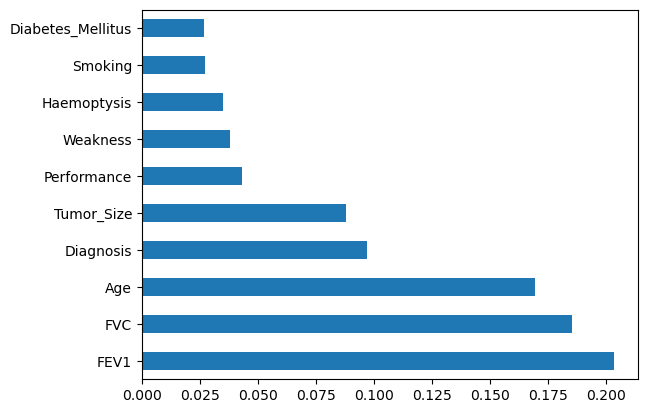

In [134]:
feature_importance_df.nlargest(10).plot(kind='barh')

### Narrative 
+ All the methods (SelectKBest, RFE & ExtCLF ) gave me almost thesame features to use

### Checking for correlation
+ Heat Map for correlation

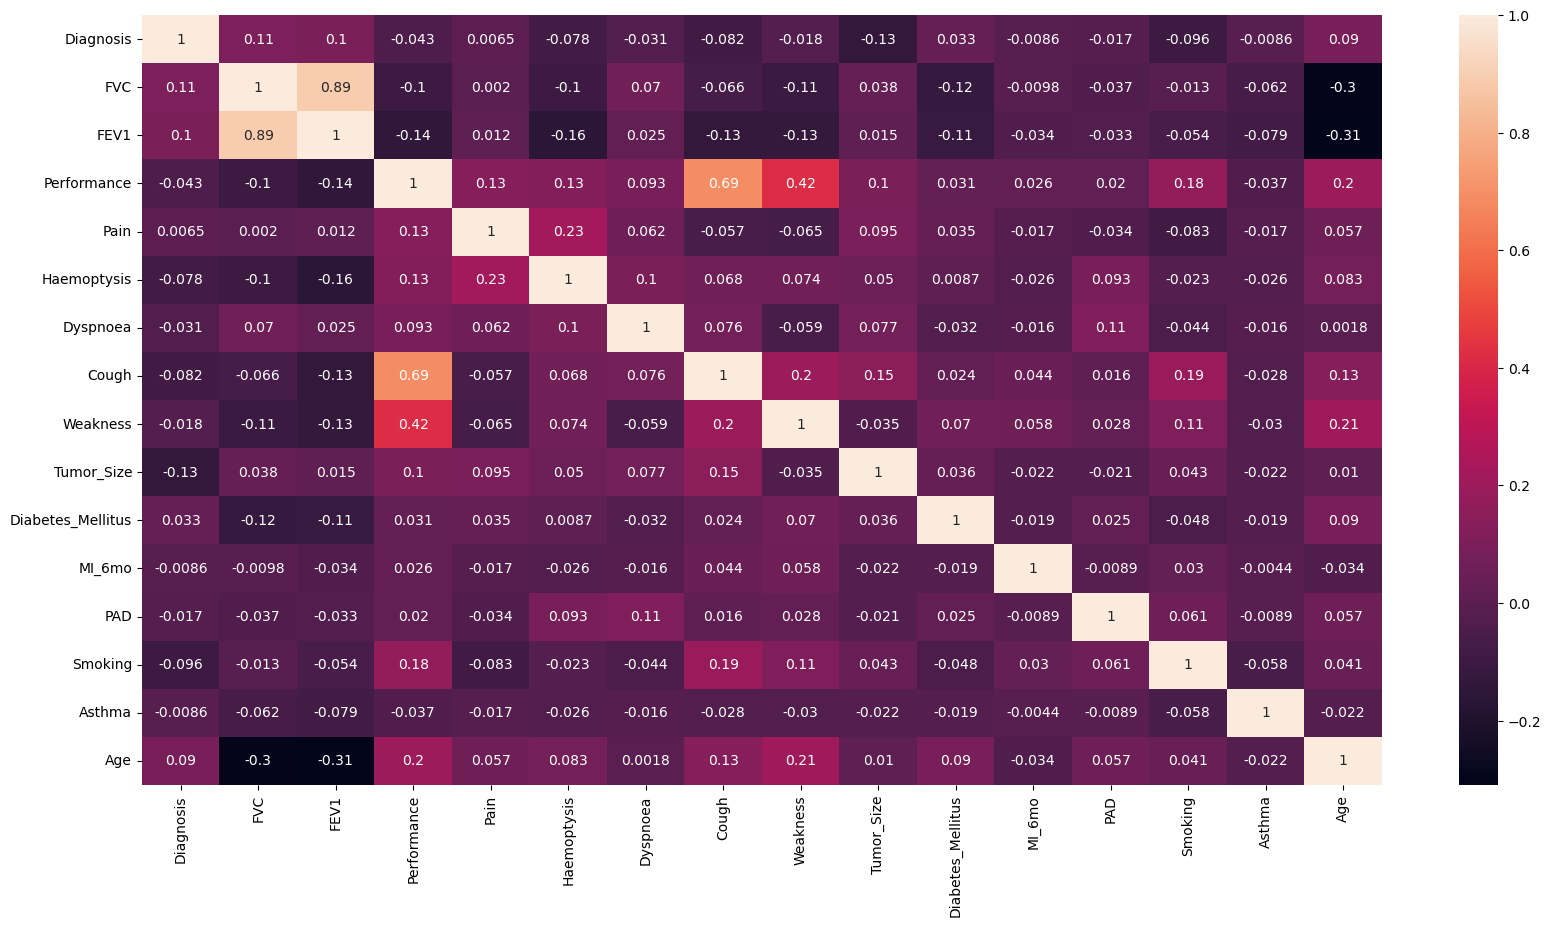

In [135]:
plt.figure(figsize=(20, 10))
sns.heatmap(xfeatures.corr(), annot=True)
plt.show()

### Model Building 
+ Features & labels
+ Data Train/Test/Split
+ Algorithm Comparisms
+ Logistic Regression
+ K-Nearest Neighbour
+ Decision Tree Classifier
+ Support Vector Machine
+ Linear Discriminant Analysis
+ Serialize (Save Model)

In [136]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Import Metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [137]:
xfeatures

,Diagnosis,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes_Mellitus,MI_6mo,PAD,Smoking,Asthma,Age
0,2,2.88,2.16,1,0,0,0,1,1,4,0,0,0,1,0,60
1,3,3.40,1.88,0,0,0,0,0,0,2,0,0,0,1,0,51
2,3,2.76,2.08,1,0,0,0,1,0,1,0,0,0,1,0,59
3,3,3.68,3.04,0,0,0,0,0,0,1,0,0,0,0,0,54
4,3,2.44,0.96,2,0,1,0,1,1,1,0,0,0,1,0,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,2,3.88,2.12,1,0,0,0,1,0,3,0,0,0,1,0,63
450,3,3.76,3.12,0,0,0,0,0,0,1,0,0,0,1,0,61
451,3,3.04,2.08,1,0,0,0,1,0,3,0,0,0,0,0,52
452,3,1.96,1.68,1,0,0,0,1,1,2,0,0,0,1,0,79


In [138]:
ylabels

0      0
1      0
2      0
3      0
4      1
      ..
449    0
450    0
451    0
452    0
453    0
Name: Death_1yr, Length: 454, dtype: int64

In [139]:
#Selected Features
df.columns

Index(['Diagnosis', 'FVC', 'FEV1', 'Performance', 'Pain', 'Haemoptysis',
       'Dyspnoea', 'Cough', 'Weakness', 'Tumor_Size', 'Diabetes_Mellitus',
       'MI_6mo', 'PAD', 'Smoking', 'Asthma', 'Age', 'Death_1yr'],
      dtype='object')

In [140]:
  xfeatures_best =  df[['Age', 'Asthma', 'Pain', 'Smoking', 'Cough',
        'Weakness', 'Performance', 'Diabetes_Mellitus',
       'Haemoptysis', 'Tumor_Size', 'FVC', 'FEV1' ]]

In [141]:
# Train/Test Dataset for best features
x_train_b, x_test_b, y_train_b, y_test_b = train_test_split(xfeatures_best, ylabels, test_size=0.30, random_state=7)

In [142]:
# Comparing ML Algorithms
# Spot Checking ML Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [143]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, shuffle=False)
    cv_results = cross_val_score(model, x_train_b, y_train_b, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)

    msg = "%s: %f (%f)" % (name, cv_results.mean()*100, cv_results.std())
    print(msg)

LR: 86.461694 (0.050074)
LDA: 85.846774 (0.048190)
CART: 77.963710 (0.061330)
SVM: 87.086694 (0.049018)
KNN: 85.493952 (0.058284)
NB: 24.576613 (0.082126)


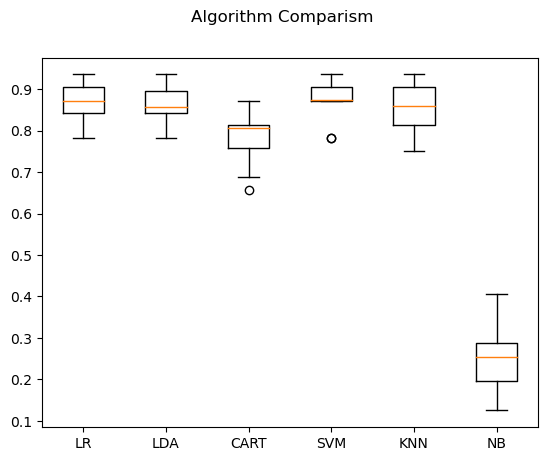

In [144]:
#Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparism')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [145]:
# Building Model
logreg = LogisticRegression()
logreg.fit(x_train_b, y_train_b)

LogisticRegression()

In [146]:
# Model Accuracy
# Method 1
logreg.score(x_test_b, y_test_b)*100

78.83211678832117

In [147]:
# Building Model for Best features
model_logit = LogisticRegression()
model_logit.fit(x_test_b, y_test_b)

LogisticRegression()

In [148]:
# Model Accuracy for best features
# Method 1
model_logit.score(x_test_b, y_test_b)*100

81.02189781021897

In [149]:
# Single prediction
x_test_b.iloc[1]

Age                  54.00
Asthma                0.00
Pain                  0.00
Smoking               1.00
Cough                 1.00
Weakness              0.00
Performance           1.00
Diabetes_Mellitus     0.00
Haemoptysis           0.00
Tumor_Size            2.00
FVC                   4.80
FEV1                  3.41
Name: 216, dtype: float64

In [150]:
res_dic = {"Die":1, "Live":0}
x2 = [[1,2,3,4,5,6,7,8,9,10,11,12]]
x1 = x_test_b.iloc[1]

In [151]:
# Reshaping
logreg.predict(np.array(x1).reshape(1, -1))

array([0], dtype=int64)

In [152]:
# Using KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

In [153]:
# Fit
knn.fit(x_train_b, y_train_b)

KNeighborsClassifier(n_neighbors=3)

In [154]:
# Accuracy score
knn.score(x_test_b, y_test_b)*100

78.83211678832117

In [155]:
# Using support vector machine
svm = SVC()
svm.fit(x_test_b, y_test_b)
svm.score(x_test_b, y_test_b)*100

79.56204379562044

In [156]:
# Using Linear Discriminant Analysis
model_lda = LinearDiscriminantAnalysis()
model_lda.fit(x_test_b, y_test_b)
model_lda.score(x_test_b, y_test_b)*100

81.02189781021897

In [167]:
# Using Decision Tree Classifier
clf = DecisionTreeClassifier()
clf.fit(x_test_b, y_test_b)
clf.score(x_test_b, y_test_b)*100

100.0

### Save our model
+ Serialization
+ Joblib
+ Pickle
+ numpy/json/ray

In [157]:
# Using Joblib
import joblib

In [158]:
model_file_logit = open("C:\Predictive models\logit_thoracic_surg_model.pkl", "wb")
joblib.dump(model_logit, model_file_logit)
model_file_logit.close()

In [159]:
model_file_knn = open("C:\Predictive models\knn_thoracic_surg_model.pkl", "wb")
joblib.dump(knn, model_file_knn)
model_file_knn.close()

In [160]:
model_file_svm = open("C:\Predictive models\support_vector_clf_thoracic_surg_model.pkl", "wb")
joblib.dump(svm, model_file_svm)
model_file_svm.close()

In [161]:
model_file_lda = open("C:\Predictive models\lda_thoracic_surg_model.pkl", "wb")
joblib.dump(model_lda, model_file_lda)
model_file_lda.close()

In [169]:
model_file_clf = open("C:\Predictive models\clf_thoracic_surg_model.pkl", "wb")
joblib.dump(clf, model_file_clf)
model_file_clf.close()

In [162]:
# Create decision tree plot
from IPython.display import Image
from sklearn import tree
import pydotplus

In [163]:
feature_names_best = xfeatures_best.columns

In [164]:
target_names = ["Die", "Live"]

In [170]:
# Create a Dot Plot
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=feature_names_best, class_names=target_names)

In [171]:
# Draw a graph
graph = pydotplus.graph_from_dot_data(dot_data)

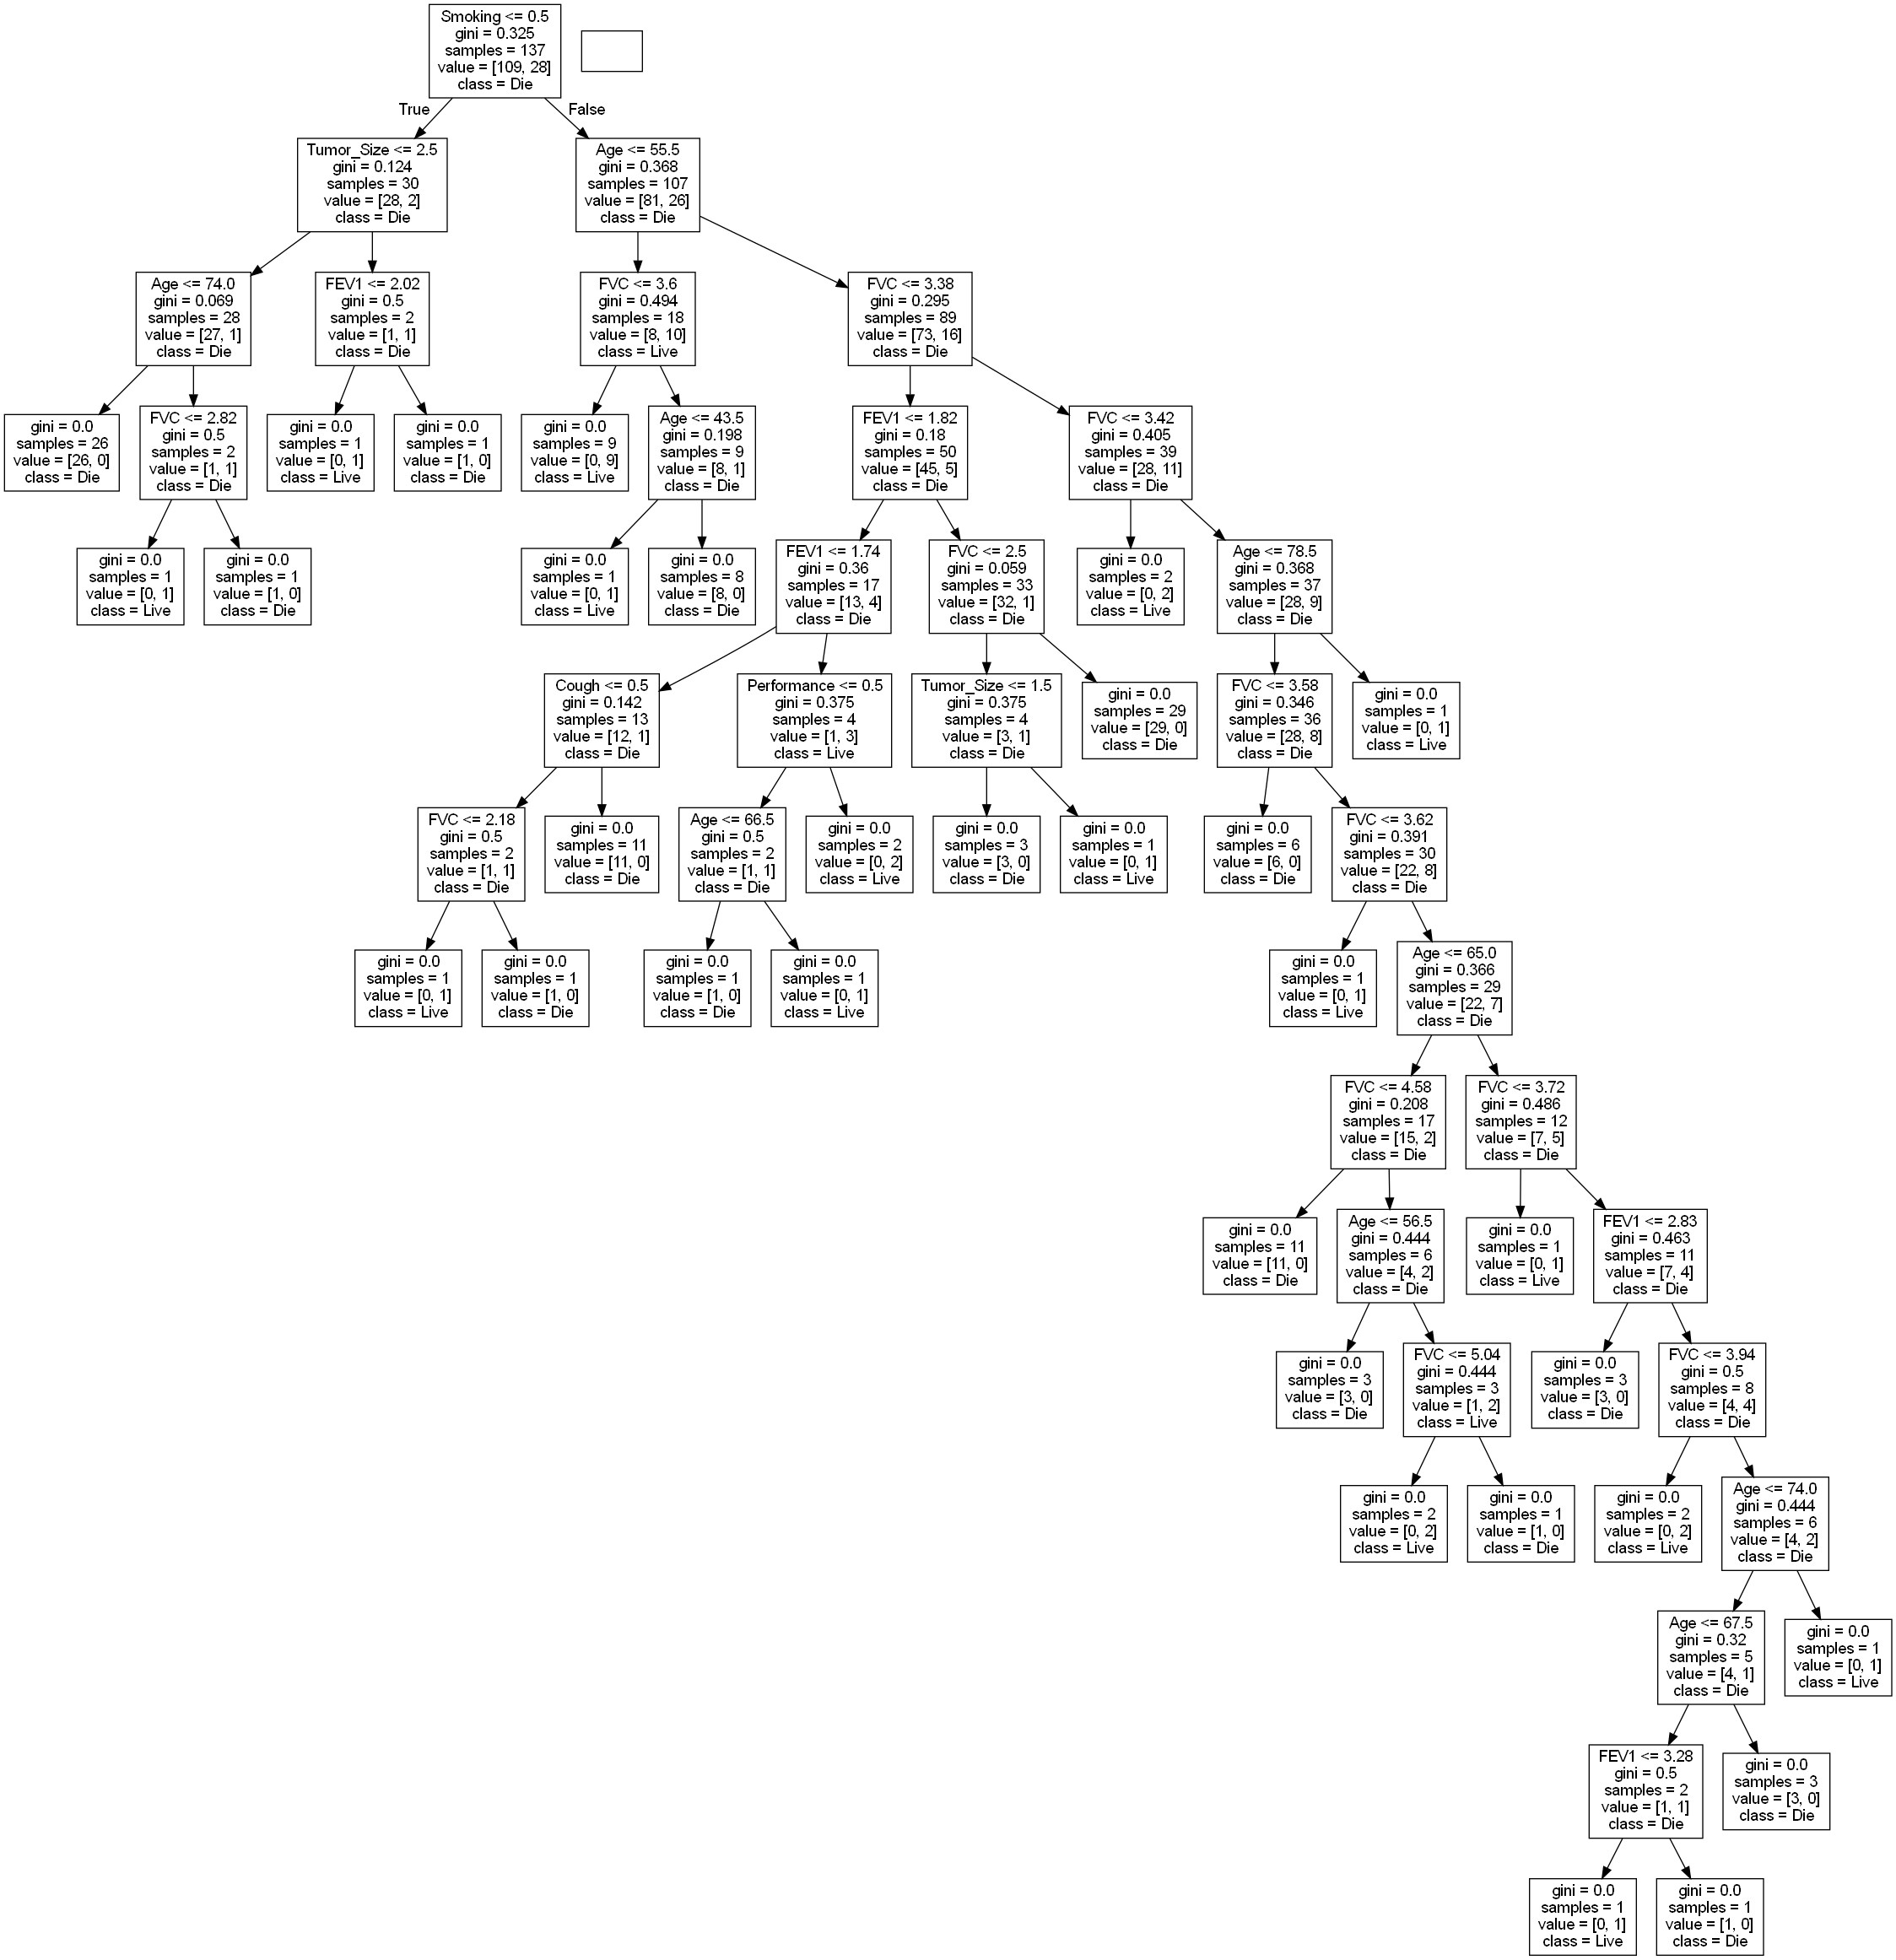

In [172]:
Image(graph.create_png())

In [173]:
# Save the Plot
graph.write_png("hep_decision_tree_plot.png")

True

### Interprete model and evaluate
+ Eli5 
+ Lime
+ SHAP
+ Skater

In [184]:
# Interpreting with Lime
import lime
import lime.lime_tabular

In [185]:
# Methods and attributes
dir(lime)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'discretize',
 'exceptions',
 'explanation',
 'lime_base',
 'lime_tabular']

### Create Explainer
+ LimeTabularExplainer = Tables
+ LimeTextExplainer = Text
+ LimeImageExplainer = Images

In [183]:
feature_names_best

Index(['Age', 'Asthma', 'Pain', 'Smoking', 'Cough', 'Weakness', 'Performance',
       'Diabetes_Mellitus', 'Haemoptysis', 'Tumor_Size', 'FVC', 'FEV1'],
      dtype='object')

In [ ]:
target_names

['Die', 'Live']

In [180]:
class_names = ["Die(1)", "Live(0)"]

In [186]:
# Create Explainer
explainer = lime.lime_tabular.LimeTabularExplainer(x_train_b.values, 
                                      feature_names=feature_names_best, 
                                      class_names=class_names, 
                                      discretize_continuous=True)

In [187]:
x1

Age                  54.00
Asthma                0.00
Pain                  0.00
Smoking               1.00
Cough                 1.00
Weakness              0.00
Performance           1.00
Diabetes_Mellitus     0.00
Haemoptysis           0.00
Tumor_Size            2.00
FVC                   4.80
FEV1                  3.41
Name: 216, dtype: float64

In [188]:
x_test_b.iloc[1]

Age                  54.00
Asthma                0.00
Pain                  0.00
Smoking               1.00
Cough                 1.00
Weakness              0.00
Performance           1.00
Diabetes_Mellitus     0.00
Haemoptysis           0.00
Tumor_Size            2.00
FVC                   4.80
FEV1                  3.41
Name: 216, dtype: float64

In [189]:
exp = explainer.explain_instance(x_test_b.iloc[1], knn.predict_proba, num_features=14, top_labels=1)

In [190]:
exp.show_in_notebook(show_table=True, show_all=False)

### Evaluation of Model
+ Confusion Matrix
+ Classification Report
+ Accuracy Score

In [179]:
# Classification report
from sklearn.metrics import classification_report
y_pred = knn.predict(x_test_b)
print(classification_report(y_test_b, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91       109
           1       0.77      0.36      0.49        28

    accuracy                           0.85       137
   macro avg       0.81      0.66      0.70       137
weighted avg       0.84      0.85      0.82       137



In [178]:
# Accuracy Score
knn = KNeighborsClassifier()
knn.fit(x_test_b, y_test_b)
knn.score(x_test_b, y_test_b)*100

84.67153284671532